**Александр, привет!**

Меня зовут Артемьева Саша, я буду проверять твой проект. Приятно познакомиться, хоть и заочно:)
    
Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Цель проекта: Необходимо сделать предварительный анализ тарифов "Смарт" и "Ультра" на небольшой выборке клиентов, чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. 

# Примечания к основным условиям: «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> В начале работы всегда очень важно писать цель, а также важные пункты, на которые стоит обращать внимание. К примеру, «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт

<div class="alert alert-info"> <b>Комментарий студента:</b> написал цель проекта и важные пункты, требующие внимания.</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Отлично! Не забывай про это в будущих работах

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Также в начале работы очень важно изучить каждый датафрейм: проверить его на пропуски, выбросы и дубли, построить распределение данных. Давай сделаем это

<div class="alert alert-info"> <b>Комментарий студента:</b> Ниже изучил DF на предмет пропусков, дубликатов и выбросов. Построил распределения.</div>

# df-calls на предмет пропусков, дубликатов и выборосов

In [15]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [16]:
df_calls.info()
#df_calls.isna().mean()
print(df_calls.isna().sum()) # пропусков нет
df_calls.duplicated().sum() # дубликатов нет
#df_calls = df_calls.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
id           0
call_date    0
duration     0
user_id      0
dtype: int64


0

In [17]:
df_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

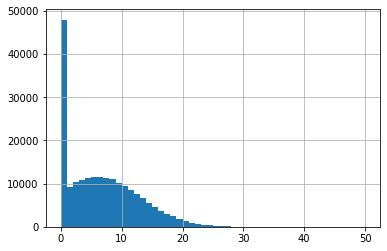

In [18]:
df_calls['duration'].hist(bins=50, range = (0, 50)) # распределение показывает длительность звонка 0.0 более 40 000 раз.
# по условию проекта - нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Верно

# df-internet на предмет пропусков, дубликатов и выборосов

In [19]:
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [20]:
df_internet.info()
#df_internet.isna().mean()
print(df_internet.isna().sum()) # пропусков нет
df_internet.duplicated().sum() # дубликатов нет
#df_internet = df_calls.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


0

In [21]:
df_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

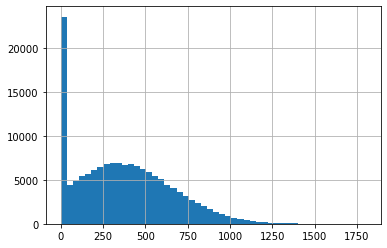

In [22]:
df_internet['mb_used'].hist(bins=50, range = (0, 1800)) # похожее на распределение звонков и показывает длительность сессии 0.0 более 20 000 раз.
# как и пропущенные звонки нулевые и-нет сессии мы удалять не будем

# df_messages на предмет пропусков, дубликатов и выборосов

In [23]:
df_messages.info()
#df_messages.isna().mean()
print(df_messages.isna().sum()) # пропусков нет
df_messages.duplicated().sum() # дубликатов нет
#df_messages = df_messages.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
id              0
message_date    0
user_id         0
dtype: int64


0

In [24]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
i_messages = df_messages.groupby(['user_id', 'month']).count()
i_messages['message_date'].describe()

count    2717.000000
mean       45.283769
std        35.051363
min         1.000000
25%        19.000000
50%        38.000000
75%        63.000000
max       224.000000
Name: message_date, dtype: float64

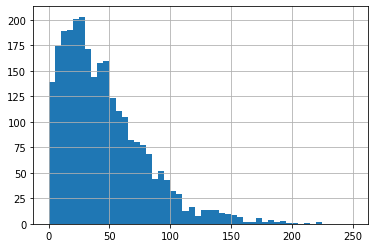

In [25]:
i_messages['message_date'].hist(bins=50, range = (0, 250)) # распределение показывает обычное среднестатистическое использование
#SMS сервисом от минимум 1 смс до 224 как максимум.

In [26]:
df_users.info()
#print(df_users.isna().sum()) # 462 пропуска в столбце 'churn_date'
df_users.duplicated().sum() # дубликатов нет
df_users['churn_date'] = df_users['churn_date'].fillna(0) # заменили пропуски на 0
print(df_users.isna().sum())
# делать распределения нет смысла, так как выбросы определятьлучше по видам услуг, а их здесь нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Очень важно делать небольшие выводы к каждому разделу. Они формируют общий вывод к работе

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Все так

# Группируем данные data set 'calls'

In [27]:
#df_calls.info()
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month # выбираем из формата "даты" отдельно "месяц"
df_calls.groupby(['user_id', 'month']).sum()



duration
user_id month          
1000    5        150.06
        6        158.90
        7        318.80
        8        389.87
        9        440.14
...                 ...
1498    10       232.63
1499    9         64.65
        10       429.91
        11       576.50
        12       465.16

[3174 rows x 1 columns]

# Вывод

после группировки становится понятно в какой именно месяц какой объем минут тратит конкретный абонент

# Группируем данные data set 'internet'

In [28]:
#df_internet.info()
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.groupby(['user_id', 'month']).sum()



Unnamed: 0   mb_used
user_id month                      
1000    5             443   2253.49
        6            5536  23233.77
        7            3504  14003.64
        8            2977  14055.93
        9            2746  14568.91
...                   ...       ...
1498    10        8798268  20579.36
1499    9          746608   1845.75
        10        8660473  17788.51
        11        7316606  17963.31
        12        6719082  13055.58

[3203 rows x 2 columns]

# вывод

по той же схеме выясняем подбробности потребления и-нет траффка каждым абонентом. При этом видим не очень нужный столбец "Unnamed", который мы исключим при объединении data frames

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Unnamed: 0 возникает, когда данные сохраняют с указанием индекса pd.DataFrame().to_csv(..., index=column). Если при чтении указать этот столбец pd.read_csv(..., index_col=0) - данные сразу прочитаются корректно.

In [29]:
data_1 = df_calls.merge(df_internet, on=['user_id', 'month'], how='left') # объединили первые DF по user_id и month
#data_1.head()
data_1 = data_1[['user_id', 'month', 'duration', 'mb_used']]
data_1

,user_id,month,duration,mb_used
0,1000,7,0.00,415.70
1,1000,7,0.00,337.71
2,1000,7,0.00,723.38
3,1000,7,0.00,558.38
4,1000,7,0.00,478.19
...,...,...,...,...
9817347,1499,12,19.62,585.26
9817348,1499,12,19.62,26.11
9817349,1499,12,19.62,0.00
9817350,1499,12,19.62,910.19


# Группируем данные data set 'messages'

In [30]:
df_messages.info()
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages.head()
df_messages.groupby(['user_id', 'month']).count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


id  message_date
user_id month                  
1000    5      22            22
        6      60            60
        7      75            75
        8      81            81
        9      57            57
...            ..           ...
1498    10     42            42
1499    9      11            11
        10     48            48
        11     59            59
        12     66            66

[2717 rows x 2 columns]

# Предобработка DF tariffs

In [31]:
df_tariffs.info()
df_tariffs = df_tariffs.rename(columns={('tariff_name'): 'tariff'}) # заменил стоблец на tariff
df_tariffs.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


# Предобработка DF users

In [32]:
df_users.info()
df_users['month'] = pd.DatetimeIndex(df_users['reg_date']).month
#df_users['month'] = df_users['reg_date'].astype('datetime64[M]') # получилось вновь YY-MM-DD. Не до конца понял как этим методом пользоваться 
df_users.groupby(['user_id', 'month'])[['city', 'age', 'churn_date', 'first_name', 'last_name', 'tariff']].count()

df_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5
5,1005,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1
6,1006,21,0,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2
7,1007,65,0,Москва,Юна,Березина,2018-04-19,smart,4
8,1008,63,0,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,12
9,1009,24,0,Пермь,Василиса,Блинова,2018-03-22,smart,3


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем (метод month может привести к ошибке). Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Ты получил верный формат - первый день месяца нужного года в формате даты. Так мы сразу можем работать с месяцем нужного года, не пережвая, что месяцы схлопнутся в один

# Объем интернет траффика по месяцам

In [33]:
internet_month = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum', margins = True).reset_index()
internet_month
# вычислили какой суммарный объем data траффика, сколько сессий и сколько в среднем мб за сессию тратит user в разрезе каждого
# месяца
#internet_voice_merge = internet_month.merge(df_users, on=['user_id', 'month'], how='right')


,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31
3202,1499,12,13055.58


# Объем голосового траффика по месяцам + интернет траффик

In [34]:
voice_month = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum', margins = True).reset_index()
voice_month
# вычислили какой суммарный объем голосового траффика, сколько звонков и сколько в среднем мин за сессию тратит user в разрезе каждого
# месяца
internet_voice_merge = internet_month.merge(voice_month, on=['user_id', 'month'], how='left') #объединили объем голосового
# траффика и data траффика в один DF


# Кол-во отправленных СМС по месяцам + voice + интернет траффик

In [35]:
message_month = df_messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count', margins = True).reset_index()
message_month
# вычислили сколько всего отправил СМС каждый user в разрезе каждого
# месяца
i_v_m = internet_voice_merge.merge(message_month, on=['user_id', 'month'], how='left') # объединил предыдущий DF с данными по СМС


# объединение в единый Df для дальнейшего анализа

In [36]:
i_v_m_users = i_v_m.merge(df_users, on='user_id', how='left') # Добавил df_users
i_v_m_tariffs = i_v_m_users.merge(df_tariffs, on='tariff', how='left') # и присоединил тарифы
i_v_m_tariffs

,user_id,month_x,mb_used,duration,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,2253.49,150.06,22.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
1,1000,6,23233.77,158.90,60.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
2,1000,7,14003.64,318.80,75.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
3,1000,8,14055.93,389.87,81.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
4,1000,9,14568.91,440.14,57.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1499,9,1845.75,64.65,11.0,35.0,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
3200,1499,10,17788.51,429.91,48.0,35.0,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
3201,1499,11,17963.31,576.50,59.0,35.0,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
3202,1499,12,13055.58,465.16,66.0,35.0,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0


In [38]:
#i_v_m_tariffs.isna().sum()
i_v_m_tariffs['duration'] = i_v_m_tariffs['duration'].fillna(0)
i_v_m_tariffs['message_date'] = i_v_m_tariffs['message_date'].fillna(0) # заменили все пропуски в двух столбцах на нули


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Объединение корректно. Также очень важно заполнить пропуски в новой таблице нулями, это может повлиять на результаты анализа

<div class="alert alert-info"> <b>Комментарий студента:</b> заменили все пропуски в двух столбцах на нули.</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Отлично!

# Подсчет выручки для каждого абонента

In [39]:
# округляем звонки и и-нет траффик по целого вбольшую сторону
i_v_m_tariffs['duration'] = np.ceil(i_v_m_tariffs['duration'])
i_v_m_tariffs['mb_used'] = np.ceil(i_v_m_tariffs['mb_used'])
i_v_m_tariffs.head(10)

,user_id,month_x,mb_used,duration,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,2254.0,151.0,22.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
1,1000,6,23234.0,159.0,60.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
2,1000,7,14004.0,319.0,75.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
3,1000,8,14056.0,390.0,81.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
4,1000,9,14569.0,441.0,57.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
5,1000,10,14703.0,329.0,73.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
6,1000,11,14757.0,320.0,58.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
7,1000,12,9818.0,313.0,70.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0
8,1001,11,18430.0,409.0,0.0,41.0,0,Москва,Иван,Ежов,2018-11-01,smart,11.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0
9,1001,12,14037.0,392.0,0.0,41.0,0,Москва,Иван,Ежов,2018-11-01,smart,11.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0


In [40]:
def revenue (row): # создаем функцию для подсчета общей выручки каждого абонента
    sms = (row['message_date'] - row['messages_included']) * row['rub_per_message']
    calls = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    data = (row['mb_used'] - row['mb_per_month_included'])/1024 * row['rub_per_gb']
    total = 0
    for i in [sms, calls, data]:
        if i > 0:
            #total = sms + calls + data + row['rub_monthly_fee']
            total += i
        if i < 0:
            total = row['rub_monthly_fee']
        if i == 0:
            total = row['rub_monthly_fee']
    return total
i_v_m_tariffs['revenue'] = i_v_m_tariffs.apply(revenue, axis = 1)
i_v_m_tariffs.tail(20)
            

,user_id,month_x,mb_used,duration,message_date,age,churn_date,city,first_name,last_name,...,tariff,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
3184,1496,5,23710.0,460.0,40.0,36.0,0,Вологда,Трифон,Блохин,...,smart,1.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,2180.859375
3185,1496,6,20135.0,530.0,35.0,36.0,0,Вологда,Трифон,Блохин,...,smart,1.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1572.617188
3186,1496,7,24365.0,551.0,42.0,36.0,0,Вологда,Трифон,Блохин,...,smart,1.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,2461.789062
3187,1496,8,23531.0,498.0,41.0,36.0,0,Вологда,Трифон,Блохин,...,smart,1.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,2145.898438
3188,1496,9,26935.0,458.0,29.0,36.0,0,Вологда,Трифон,Блохин,...,smart,1.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,2810.742188
3189,1496,10,28184.0,427.0,35.0,36.0,0,Вологда,Трифон,Блохин,...,smart,1.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,3054.687500
3190,1496,11,25064.0,634.0,46.0,36.0,0,Вологда,Трифон,Блохин,...,smart,1.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,2847.312500
3191,1496,12,20737.0,484.0,51.0,36.0,0,Вологда,Трифон,Блохин,...,smart,1.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1600.195312
3192,1497,10,11501.0,464.0,20.0,32.0,0,Челябинск,Каролина,Агеева,...,smart,10.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
3193,1497,11,14157.0,347.0,14.0,32.0,0,Челябинск,Каролина,Агеева,...,smart,10.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Кажется, мы забыли округлить данные, как это требуют в задании. Давай сделаем это

<div class="alert alert-info"> <b>Комментарий студента:</b> округлил звонки и и-нет траффик по целого вбольшую сторону.</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Выбран корректный метод округления данных!

In [41]:
i_v_m_tariffs.tariff.value_counts() # проверим общее кол-во смартов и ультра
i_v_m_tariffs.revenue.isna().sum() # проверим столбец выручка на наличие пропусков

0

In [42]:
#i_v_m_tariffs['month_x'] = pd.to_numeric(i_v_m_tariffs['month_x'])
i_v_m_tariffs['revenue'] = i_v_m_tariffs['revenue'].astype('int') #заменил тип данных по столбцу revenue на 'int'
i_v_m_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3204 entries, 0 to 3203
Data columns (total 21 columns):
user_id                  3204 non-null object
month_x                  3204 non-null object
mb_used                  3204 non-null float64
duration                 3204 non-null float64
message_date             3204 non-null float64
age                      3203 non-null float64
churn_date               3203 non-null object
city                     3203 non-null object
first_name               3203 non-null object
last_name                3203 non-null object
reg_date                 3203 non-null object
tariff                   3203 non-null object
month_y                  3203 non-null float64
messages_included        3203 non-null float64
mb_per_month_included    3203 non-null float64
minutes_included         3203 non-null float64
rub_monthly_fee          3203 non-null float64
rub_per_gb               3203 non-null float64
rub_per_message          3203 non-null float64
rub_per_

# Разделение услуг по тарифам и подсчет по каждому месяцу

In [43]:
data_tariff = i_v_m_tariffs.pivot_table(index = ['month_x', 'tariff'],
                                 values = ['revenue', 'duration', 'message_date', 'mb_used'],
                                 aggfunc = ['sum', 'mean'], margins = True)
#display(data_tariff.sort_values(('count', 'revenue'), ascending = False).head(25))

In [44]:
data_tariff.query('(tariff == "smart")').sort_values(by='month_x') # фильтр по smart

sum                                        mean  \
                duration    mb_used message_date revenue    duration   
month_x tariff                                                         
1       smart     6579.0   289482.0        620.0   23713  193.500000   
2       smart    16438.0   672656.0       1397.0   44220  283.413793   
3       smart    28362.0  1163058.0       2453.0   79832  368.337662   
4       smart    38838.0  1507817.0       3443.0   94128  346.767857   
5       smart    51565.0  2228598.0       4762.0  149544  365.709220   
6       smart    61283.0  2590405.0       5478.0  173151  373.676829   
7       smart    77587.0  3164469.0       6784.0  213903  386.004975   
8       smart    93569.0  3903634.0       7904.0  269938  399.867521   
9       smart   105303.0  4239065.0       8746.0  280881  405.011538   
10      smart   118412.0  4926730.0       9927.0  351390  402.761905   
11      smart   129908.0  5339197.0      10768.0  369973  411.101266   
12      smart   152391.0  6104468.0      12130.0  455646  452.198813   

                                                        
                     mb_used message_date      revenue  
month_x tariff                                          
1       smart    8514.176471    18.235294   697.441176  
2       smart   11597.517241    24.086207   762.413793  
3       smart   15104.649351    31.857143  1036.779221  
4       smart   13462.651786    30.741071   840.428571  
5       smart   15805.659574    33.773050  1060.595745  
6       smart   15795.152439    33.402439  1055.798780  
7       smart   15743.626866    33.751244  1064.194030  
8       smart   16682.196581    33.777778  1153.581197  
9       smart   16304.096154    33.638462  1080.311538  
10      smart   16757.585034    33.765306  1195.204082  
11      smart   16896.193038    34.075949  1170.800633  
12      smart   18114.148368    35.994065  1352.065282

In [45]:
data_tariff.query('(tariff == "ultra")').sort_values(by='month_x') # фильтр по 'ultra'

sum                                        mean  \
               duration    mb_used message_date revenue    duration   
month_x tariff                                                        
1       ultra    3648.0   118272.0        304.0   17550  405.333333   
2       ultra    6566.0   282632.0        522.0   43443  298.454545   
3       ultra   17130.0   648835.0       1195.0   74129  462.972973   
4       ultra   23780.0   925574.0       1736.0  109724  432.363636   
5       ultra   32099.0  1297366.0       2515.0  135697  486.348485   
6       ultra   37874.0  1589735.0       3467.0  168696  456.313253   
7       ultra   46691.0  1865150.0       4499.0  189849  518.788889   
8       ultra   51387.0  2094693.0       5142.0  219573  484.783019   
9       ultra   58393.0  2208549.0       5981.0  229558  512.219298   
10      ultra   64563.0  2465640.0       7152.0  250965  529.204918   
11      ultra   68265.0  2651500.0       7447.0  276763  513.270677   
12      ultra   77609.0  3029323.0       8386.0  293466  562.384058   

                                                        
                     mb_used message_date      revenue  
month_x tariff                                          
1       ultra   13141.333333    33.777778  1950.000000  
2       ultra   12846.909091    23.727273  1974.681818  
3       ultra   17536.081081    32.297297  2003.486486  
4       ultra   16828.618182    31.563636  1994.981818  
5       ultra   19657.060606    38.106061  2056.015152  
6       ultra   19153.433735    41.771084  2032.481928  
7       ultra   20723.888889    49.988889  2109.433333  
8       ultra   19761.254717    48.509434  2071.443396  
9       ultra   19373.236842    52.464912  2013.666667  
10      ultra   20210.163934    58.622951  2057.090164  
11      ultra   19936.090226    55.992481  2080.924812  
12      ultra   21951.615942    60.768116  2126.565217

# Вычисление среднего, дисперсии и стандартного отклонения по звонкам, и-нет траффику, СМС

# Среднее, дисперсия и стандартное отколнениев разрезе тарифов

In [46]:
i_v_m_tariffs.pivot_table(index= 'tariff', values= ['duration', 'mb_used', 'message_date'], aggfunc= ['mean', 'var','std'])


mean                                      var                \
          duration       mb_used message_date      duration       mb_used   
tariff                                                                      
smart   395.078546  16216.148564    33.398564  32353.071062  3.436001e+07   
ultra   500.517949  19668.993846    49.585641  89957.083610  9.886460e+07   

                            std                            
       message_date    duration      mb_used message_date  
tariff                                                     
smart     796.69963  179.869595  5861.741292    28.225868  
ultra    2301.92464  299.928464  9943.067706    47.978377


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Верно

# распределение используемых минут в месяц в разрезе тарифов

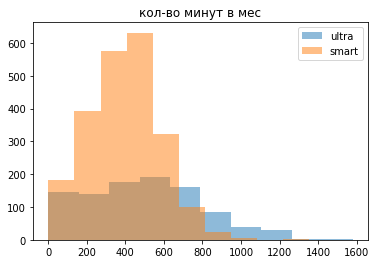

In [47]:

plt.hist(i_v_m_tariffs[i_v_m_tariffs['tariff'] == 'ultra']['duration'], bins=10, alpha=0.5, label='ultra')
plt.hist(i_v_m_tariffs[i_v_m_tariffs['tariff'] == 'smart']['duration'], bins=10, alpha=0.5, label='smart')
plt.legend(loc='upper right')
plt.title('кол-во минут в мес')
plt.show()
# исходя из таблиц data_tariff и гистограмм можно сделать следующие выводы:
# 1) абонент на тарифе смарт значительно чаще "выговаривается" пакет минут, а следовательно и генерирует дополнительную voice revenue сверх пакета
# 2) абонент на тарифе ультра никогда не выговаривает месяный пакет. Чаще всего он выговаривает от 400 - 700 минут,что немного 
# делает их по потреблению "голоса" схожими с абонентами смарта


# распределение используемого и-нет траффика в месяц в разрезе тарифов

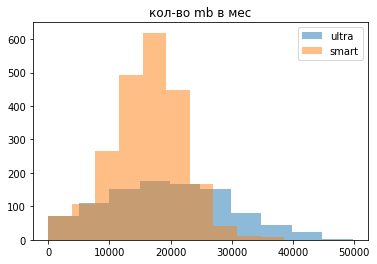

In [48]:
plt.hist(i_v_m_tariffs[i_v_m_tariffs['tariff'] == 'ultra']['mb_used'], bins=10, alpha=0.5, label='ultra')
plt.hist(i_v_m_tariffs[i_v_m_tariffs['tariff'] == 'smart']['mb_used'], bins=10, alpha=0.5, label='smart')
plt.legend(loc='upper right')
plt.title('кол-во mb в мес')
plt.show()
# исходя из таблиц data_tariff и гистограмм можно сделать следующие выводы:
# 1) абонент на тарифе смарт значительно чаще выходит за рамки лимита. Чаще всего абонент использует от 10 до 25 Гб, а следовательно и генерирует дополнительную data revenue сверх пакета.
# И если учесть стоимость 1 дополнительного Гб, доп выручка становится более значительна, чем от "голоса", что делает тариф смарт более маржинальным.
# 2) абонент на тарифе ультра в большинстве случаев использует свои 30 гб пакета. Чаще всего он использует от 15 до 30 Гб в мес, минут,в то же время видно
# что значаительная часть абонентов использует 40 Гб, что наводит на мысль об увеличении пакета Гб и уменьшении кол-ва минут, а также повышении 
# о повышении абонентской платы на тарифе ультра.

# распределение используемых смс в месяц в разрезе тарифов

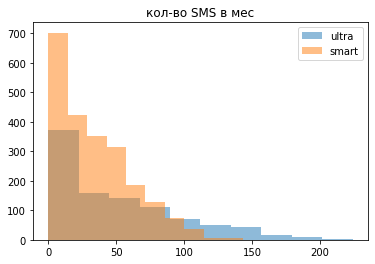

In [49]:
plt.hist(i_v_m_tariffs[i_v_m_tariffs['tariff'] == 'ultra']['message_date'], bins=10, alpha=0.5, label='ultra')
plt.hist(i_v_m_tariffs[i_v_m_tariffs['tariff'] == 'smart']['message_date'], bins=10, alpha=0.5, label='smart')
plt.legend(loc='upper right')
plt.title('кол-во SMS в мес')
plt.show()
# исходя из таблиц data_tariff и гистограмм можно сделать следующие выводы:
# 1) практически все абоненты смарта стараются полностью использовать пакет СМС, однако остается значительная часть абонентов,
# кто превышает пакет и генерирует доп выручку на сообщениях.Но все заканчивается менее чем на 150 СМС в мес.
# 2) абонент на тарифе ультра никогда не использует месяный пакет СМС. Видно, что он не видит необходимости пользоваться этой услугой,
# предпочитая ей мессенджеры мобильного интернета.


# Вывод
1)группировка тарифов по месяца внутри года и по потреблению услуг как в абсолютном так и в относительном выражении говорит о том, что рост потребления, а как следствие и выручки у ТП смарт прослеживается от января к декабрю прямо по нарастающей и в ядром роста является и-нет траффик.

2) потребление минут на ТП Ультра показывает, что в среднем ни в дном месяце абонент не вышел за рамки пакета. Выручка сверх абонетнской платы складывается в основоном за счет тех абонентов, кто перелимичивают свой пакет Гб. 

3) при рассмотрении этих двух ТП в рамках всех регионов в относительном выражении можно сделать вывод о том, что абонент Ультра приносит больше выручки, чем абонент ТП Смарт. но это поверхностный вывод, так как платежеспособность регионов разная и абсолютное кол-во ТП смарт "побеждают" в борьбе за выручку высоко маржинальный,но дорогой ТП Ультра. 

# группируем оба тарифа по сумме выручки и средней выручке

In [50]:
i_v_m_tariffs.groupby('tariff').agg({'revenue': ['sum', 'mean']}).round(1)
# сумма выручки говорит о том, что ТП смарт приносит больше доходов, чем ультра. Однако средняя выручка расставляет 
# все на свои места. Один абонент ТП ультра приносит приблизительно в 2 раза выручки, чем абонент ТП смарт. 
# в то же время однозначные выводы делать пока рано
i_v_m_tariffs.pivot_table(index= 'tariff', values= 'revenue', aggfunc= ['count', 'var']) # дисперсия выборок значительно отличается
# выборки также значительно различаются 
# поэтому в работе с гипотезами применим параметр 'equal_var=False'

,count,var
,revenue,revenue
tariff,,
smart,2228,576527.221507
ultra,975,127031.232092


In [51]:
i_v_m_tariffs.dropna(subset = ['city', 'revenue'], 
inplace = True) # убираем по 1 пропуску в столбцах city и revenue

# проверка нулевой гипотезы о равенстве средней выручки обоих тарифов

In [52]:
# H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
# H1: средняя выручка пользователей тарифов "Ультра" и "Смарт" не равны

from scipy import stats as st

smart = i_v_m_tariffs[i_v_m_tariffs['tariff'] == 'smart']['revenue']
ultra = i_v_m_tariffs[i_v_m_tariffs['tariff'] == 'ultra']['revenue']

alpha = 0.05 # задаем пороговой значение
 
results = st.ttest_ind(
   smart, 
   ultra)
 
display('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 
    # интересно, что результат получился при параметре equal_var = True по умолчанию.

'p-значение: '

4.352571892664458e-247

'Отвергаем нулевую гипотезу'


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Проверка верна

# проверка нулевой гипотезы средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

In [53]:
# H0: средняя выручка пользователей из Москвы и других регионов равны
# H1: средняя выручка пользователей  из Москвы и других регионов не равны
moscow_users = i_v_m_tariffs[i_v_m_tariffs['city'] == 'Москва']['revenue']
region_users = i_v_m_tariffs[i_v_m_tariffs['city'] != 'Москва']['revenue']
alpha = 0.05 # задаем пороговой значение
 
results = st.ttest_ind(
   moscow_users, 
   region_users)
 
display('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'p-значение: '

0.22712279710068592

'Не получилось отвергнуть нулевую гипотезу'


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Корректно!

# Общий вывод
1.сумма выручки говорит о том, что ТП смарт приносит больше доходов, чем ультра. Однако средняя выручка расставляет 
 все на свои места. Один абонент ТП ультра приносит приблизительно в 2 раза выручки, чем абонент ТП смарт. 

2.заметно, что дорогой тариф необходим практически только одной Москве, так как, в отличие от СМарта, даже второй по населению город страны СПБ спустился вниз и не доходит даже до 10 000 абонентов. Регионы, в том числе города миллионники не способны переварить затраты на ТП Ультра в таком же процентном соотношении как жители Москвы.(анализ чуть ниже)

Основной вывод заключается в следующем:
1. нулевая гипотеза о равенстве средней выручки обоих тарифов опровергнута. Они очевидно разнятся. ТП Ультра приносит большую выручку чем ТП СМарт удельно, однако вал подключений на ТП смарт, особенно в Регионах показал его эффективность и конкурентоспособность

2. нулевая гипотеза о равенстве средней выручки между Москвой и регонами не была отвергнута, т.к. P-значение оказалось больше alpha. При этом стоит отметить тот факт, что равенство средней вырчки между регионами далеко не единственный показатель эффективности ТП и анализ пользователей по регионам говорит об эффективности в абсолюте ТП Смарт не только в двух городах, а ТП Ультра только в Москве, о чем покажет анализ пользователей, возрастных групп в разрезе тарифов и городов ниже. Продвижение обоих тарифов стоит настроить конечно исходя из популярности в регионах.

# Дополнительно определим кто наши абоненты


In [54]:
#i_v_m_tariffs.pivot_table(index= 'city', values= 'tariff', aggfunc= ['count', 'sum'])
i_v_m_tariffs.age.value_counts()
def age_groups(age): #создаем функцию для категоризации по возрасту
    if (age >= 18) and (age < 30):
        return 'молодежь'
    if (age > 30) and (age < 50):
        return 'средний возраст'
    if (age > 50):
        return 'умудренные опытом'
    return 'почтненный возраст'
        
i_v_m_tariffs['age_groups'] =i_v_m_tariffs['age'].apply(age_groups) # создаем новый столбец с категориями по уровню дохода


# Возрастные группы 


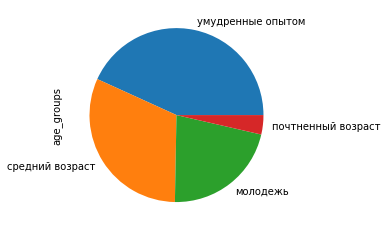

In [55]:
age_all_tariffs = i_v_m_tariffs.age_groups.value_counts().plot(kind='pie') # в общей выборке абонентов преобладает группа > 50 лет. На втором месте с открывом в 30%
# группа старше 30 лет

# Вывод
в общей выборке абонентов преобладает группа > 50 лет. На втором месте с открывом в 30% группа старше 30 лет
наименьшая группа "почтенный возраст"



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Отлично!

# Возрастные группы в Smart


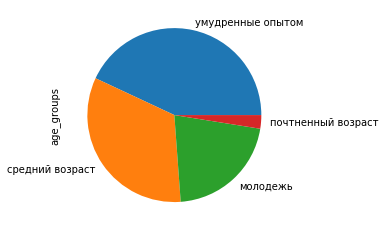

In [56]:
age_smart = i_v_m_tariffs.query('tariff == "smart"')['age_groups'].value_counts().plot(kind='pie')


# Вывод
очень похожее распределение в предыдущей диаграмме


# Возрастные группы в Ultra


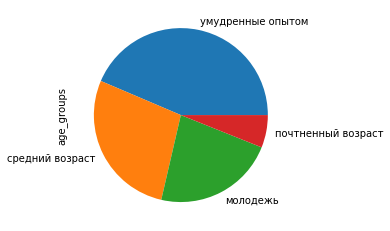

In [57]:
age_ultra = i_v_m_tariffs.query('tariff == "ultra"')['age_groups'].value_counts().plot(kind='pie')

# Вывод
группа "Молодежь начинает "съедать" места группы среднего возраста. Это главное отличие абонентаот абонента Smart
Так же заметно приросла группа "Почтенного возраста"


# А теперь разделим страну на Москву и регионы
# в разрезе каждого тарифа


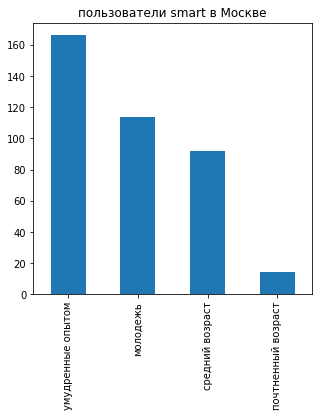

In [58]:
age_smart_moscow = i_v_m_tariffs.query('tariff == "smart" and city == "Москва"')['age_groups'].value_counts().plot(title='пользователи smart в Москве', kind='bar', figsize=(5,5))
# Самая весомая группа абонентов ТП Смарт в Москве - пользователи за 50 лет. От них с большим отрывом идут Молодежь и средний возраст
# замыкает группа в почтенном возрасте.

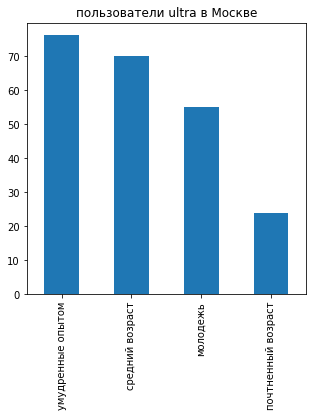

In [59]:
age_ultra_moscow = i_v_m_tariffs.query('tariff == "ultra" and city == "Москва"')['age_groups'].value_counts().plot(title='пользователи ultra в Москве', kind='bar', figsize=(5,5))
# определим какое кол-во пользователей ТП Ультра в столице по вощрастным группам. Лидер вновь возраст от 50лет. Однако, в отличе 
# от ТП Смарт в этом же городе, к этой возрастной группе вплотную приближается "срежний возраст" и "молодежь" 

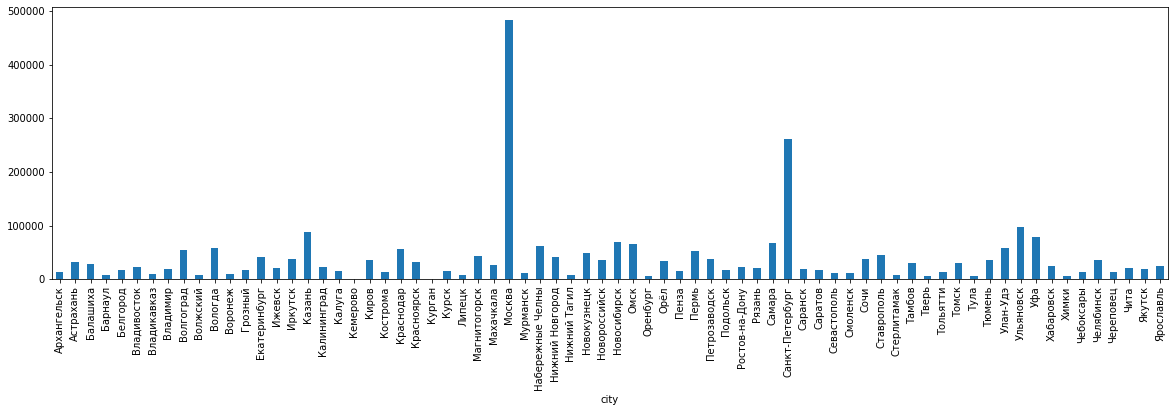

In [60]:
i_v_m_tariffs.query('tariff == "smart"').groupby('city')['user_id'].sum().plot(kind='bar', figsize=(20,5))
# Разбивка на регионы отражает платежеспособность населения. Лидеры конечноМосква и СПБ, остальные можно считать в одной весовой категории.
# немного выделяется Казань и Ульяновск, однако они слишком далеки отлидеров.

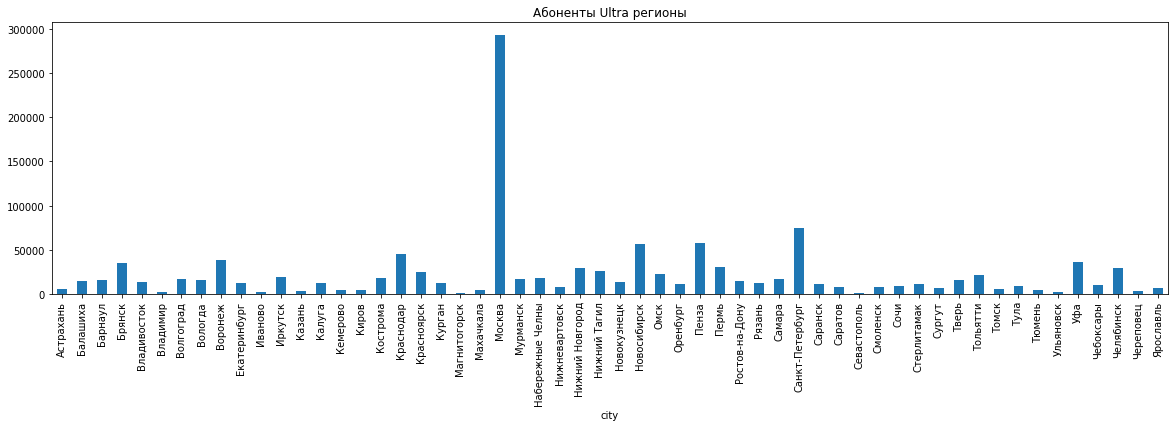

In [61]:
i_v_m_tariffs.query('tariff == "ultra"').groupby('city')['user_id'].sum().plot(title='Абоненты Ultra регионы', kind='bar', figsize=(20,5))
# заметно, что дорогой тариф необходим практически только одной Москве, так как, в отличие от СМарта, даже второй по населению город 
# страны СПБ спустился вниз и не доходит даже до 10 000 абонентов. Регионы, в том числе города миллионники не способны переварить 
# затраты на ТП Ультра в таком же процентном соотношении как жители Москвы.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Спасибо за проект! Видно, что ты старался и он получился очень сильным. Ты аккуратно работаешь с данными и выносишь качественные предположения - как настоящий аналитик. Давай сделаем его еще лучше: 
    
    
- рассмотрим датафреймы в начале работы
- выполним округление данных
- заполним пропуски в новой таблице нулями. 
    
Оставила направляющие комментарии. Возвращаю тебе работу, чтобы ты смог задать вопросы. Буду ждать твою работу на финальное ревью!
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Спасибо за проработку комментариев! Теперь все отлично. Если у тебя возникнут вопросы, смело задавай мне их через куратора. Удачи на следующих этапах!